In [134]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [135]:
img = cv.imread('silhouette45/nm-02/072/001-nm-02-072-085.png', cv.IMREAD_GRAYSCALE)

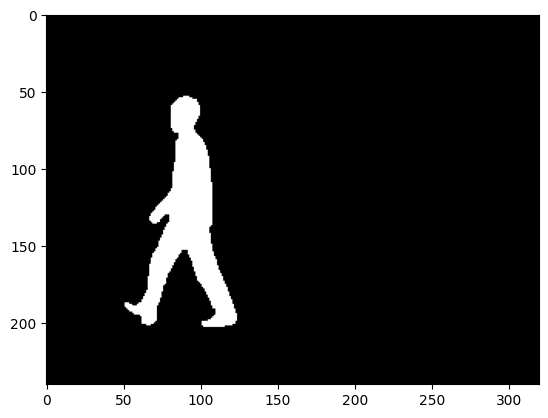

In [136]:
plt.imshow(img, cmap='gray')

In [137]:
def draw_extremes():
    for x in range(0, img.shape[0]):
        for y in range(0, img.shape[1]):
            if img[x][y] == 255:
                return (y, x)

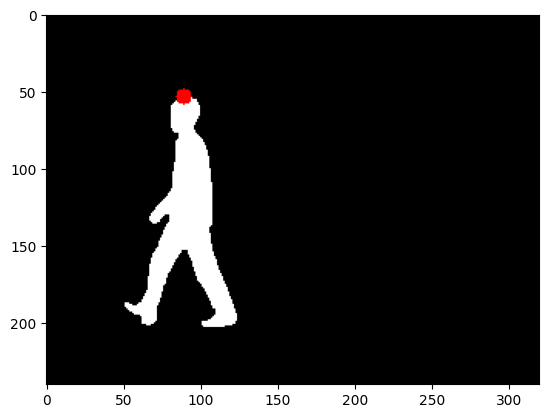

In [138]:
# draw circle in extremes in red 
output_img = cv.cvtColor(cv.cvtColor(img, cv.COLOR_GRAY2BGR), cv.COLOR_BGR2RGB)
cv.circle(output_img, draw_extremes(), 5, (255, 0, 0), cv.FILLED)
plt.imshow(output_img)

In [139]:
def draw_end_extremes():
    for x in range(img.shape[0] - 1, 0, -1):
        for y in range(img.shape[1] - 1, 0, -1):
            if img[x][y] == 255:
                return (y, x)
        

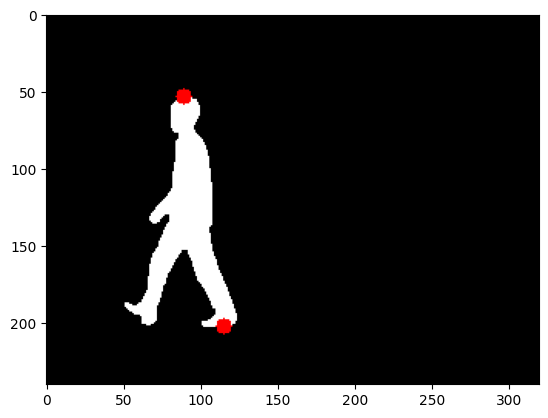

In [140]:
# draw circle in extremes in red 
cv.circle(output_img, draw_end_extremes(), 5, (255, 0, 0), cv.FILLED)
plt.imshow(output_img)

In [141]:
path = 'silhouette45/345/'

def get_extremes(img):
    x = np.argwhere(img == 255)[0]
    y = np.argwhere(img == 255)[-1]
    
    return (x[1], x[0]), (y[1], y[0])

In [142]:
import os

images = [cv.imread(os.path.join(path, f), cv.IMREAD_GRAYSCALE) for f in os.listdir(path)[:-1]]

In [143]:
get_extremes(images[0])

((284, 92), (279, 163))

In [144]:
extremes = [get_extremes(img) for img in images]

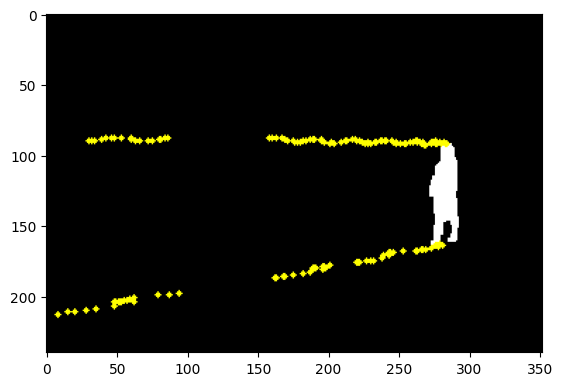

In [145]:
Im = images[0]
Im = cv.cvtColor(cv.cvtColor(Im, cv.COLOR_GRAY2BGR), cv.COLOR_BGR2RGB)

for (y1, x1), (y2, x2) in extremes:
    
    cv.circle(Im, (y1, x1), 2, (255, 255, 0), cv.FILLED)
    cv.circle(Im, (y2, x2), 2, (255, 255, 0), cv.FILLED)

plt.imshow(Im, cmap='gray')

In [146]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr2 = LinearRegression()

In [147]:
extremes = np.array(extremes)

In [148]:
X1 = extremes[:, 0, 0].reshape(-1, 1)
y1 = extremes[:, 0, 1].reshape(-1, 1)

X2 = extremes[:, 1, 0].reshape(-1, 1)
y2 = extremes[:, 1, 1].reshape(-1, 1)

In [149]:
lr1.fit(X1, y1)
lr2.fit(X2, y2)

LinearRegression()

In [150]:
x = np.arange(0, 300).reshape(-1, 1)
y1 = lr1.predict(x)
y2 = lr2.predict(x)

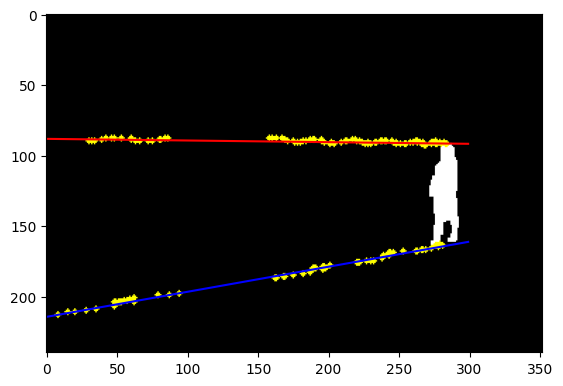

In [151]:
plt.imshow(Im, cmap='gray')
plt.plot(x, y1, c='r')
plt.plot(x, y2, c='b')

In [152]:
for img in images:
    ex = get_extremes(img)
    img = cv.cvtColor(cv.cvtColor(img, cv.COLOR_GRAY2BGR), cv.COLOR_BGR2RGB)
    cv.circle(img, ex[0], 2, (255, 255, 0), cv.FILLED)
    cv.circle(img, ex[1], 2, (255, 255, 0), cv.FILLED)
    cv.waitKey(200)
    cv.imshow('Image', img)

: 